<a href="https://colab.research.google.com/github/juhiikataria/OIBSIP/blob/main/task_5_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE**

## **TASK 5: SALES PREDICTION USING PYTHON**

## **BY: JUHI KATARIA**



In [1]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv("Advertising.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
df.describe()


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<Axes: >

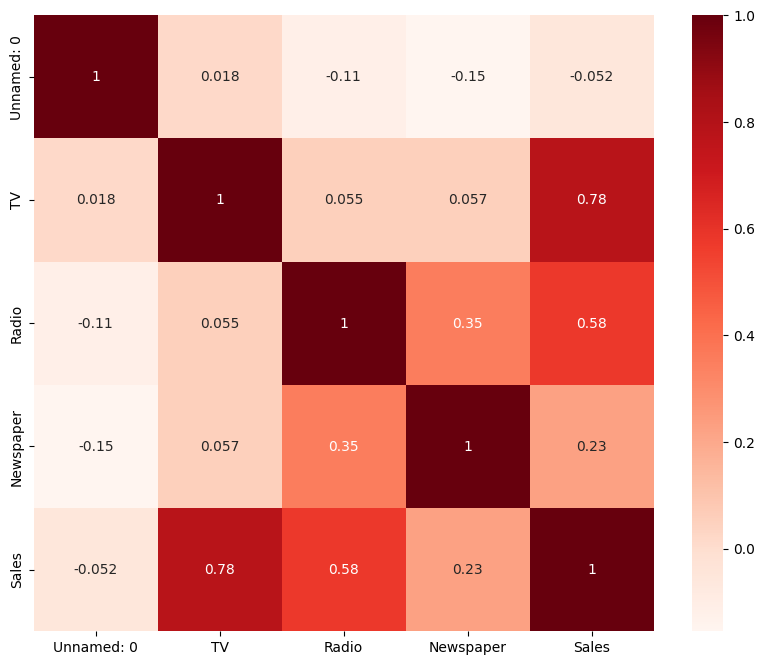

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
Linear_regression = LinearRegression()
Linear_regression.fit(X_train, y_train)
y_pred = Linear_regression.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [10]:
df_preds=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
print(df_preds)

     Actual  Predicted
95     16.9  16.408024
15     22.4  20.889882
30     21.4  21.553843
158     7.3  10.608503
128    24.7  22.112373
115    12.6  13.105592
69     22.3  21.057192
170     8.4   7.461010
174    11.5  13.606346
45     14.9  15.155070
66      9.5   9.048320
182     8.7   6.653283
165    11.9  14.345545
78      5.3   8.903493
186    10.3   9.689590
177    11.7  12.164944
56      5.5   8.736284
152    16.6  16.265073
82     11.3  10.277596
68     18.9  18.831091
124    19.7  19.560367
16     12.5  13.251035
148    10.9  12.336207
93     22.2  21.306951
65      9.3   7.827403
60      8.1   5.809574
84     21.7  20.757532
67     13.4  11.981381
125    10.6   9.183496
132     5.7   8.506699
9      10.6  12.466468
18     11.3  10.003377
55     23.7  21.387671
75      8.7  12.249664
150    16.1  18.266615
104    20.7  20.137663
135    11.6  14.055140
137    20.8  20.854112
164    11.9  11.017444
76      6.9   4.568996


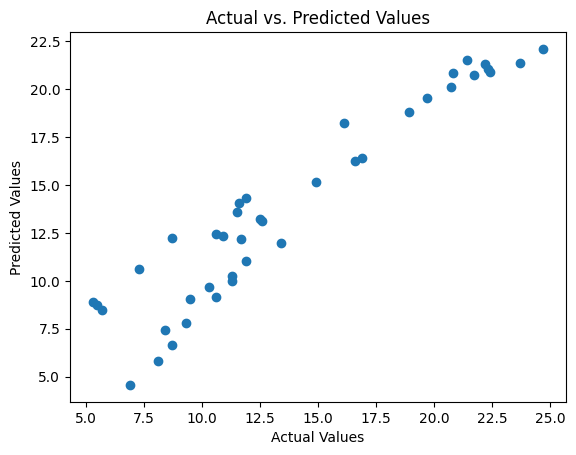

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print ('R Squared =',r2_score(y_test,y_pred ))
print ('MAE =',mean_absolute_error(y_test, y_pred))
print ('MSE =',mean_squared_error(y_test,y_pred ))

R Squared = 0.899438024100912
MAE = 1.4607567168117603
MSE = 3.1740973539761033
